<a href="https://colab.research.google.com/github/Plutooooo/hku_phys3151_2022/blob/main/multivariate-linear-regression/to_model_and_reveal_the_force_of_gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using polynomial regression to model and reveal the force of gravity

We will take a look at a simple example: the force of gravity on a falling object. The formula for the location of a falling object is:

\begin{eqnarray}
y=X_{0}+V_{0}t-\frac{1}{2}gt^{2}
\end{eqnarray}

where $X_{0}$ is the initial location of the object, i.e. its initial height.
$V_{0}$ is the initial velocity (or speed) of the object when it is at this initial position. $t$ is the time after the object was dropped. $g$ is the force of gravity, which is an acceleration of approximately 9.8 $m/s^{2}$. This is actually a constant not a variable like all of the others (unless we are dropping an object on different planets, which are not). It is negative because the force of gravity is downward, from a positive location value toward zero.

First, we will create a Python function to calculate the location of a falling object

In [1]:
def location(x_0, v_0, t):
    return x_0 + v_0*t - (9.8/2)*t**2

Next, we use this function to create a dataset and save it in a CSV file

In [2]:
import csv
import random
import math
random.seed
with open('gravity_location_data.csv', mode='w') as gravity_file:
    gravity_writer = csv.writer(gravity_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['initial_position', 'initial_velocity', 'mass', 'time', 'location'])
    for i in range (0, 10000):
        initial_position = random.uniform(0,1)
        initial_velocity = random.uniform(0,1)
        mass = random.uniform(0,1)
        time = random.uniform(0,1)
        gravity_writer.writerow([initial_position, initial_velocity, mass, time, location(initial_position, initial_velocity, time)])

What we are doing here is creating 10,000 examples, using randomized values for all of our variables, then calculating the location at a certain (randomly selected) time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/gravity_location_data.csv')
print(df)

      initial_position  initial_velocity      mass      time  location
0             0.915859          0.242772  0.949562  0.732662 -1.536563
1             0.443968          0.322196  0.503233  0.704134 -1.758606
2             0.335850          0.268673  0.517430  0.833004 -2.840431
3             0.736968          0.066624  0.670178  0.791428 -2.279457
4             0.631702          0.351265  0.754492  0.318522  0.246452
...                ...               ...       ...       ...       ...
9995          0.620745          0.839724  0.768666  0.020239  0.635733
9996          0.730391          0.013297  0.632981  0.436184 -0.196067
9997          0.361198          0.680471  0.679833  0.588633 -0.936052
9998          0.305355          0.365860  0.389722  0.530554 -0.879826
9999          0.118504          0.069954  0.891195  0.303184 -0.310697

[10000 rows x 5 columns]


In [4]:
df['initial_velocity_time']=df['initial_velocity']*df['time']
df['time^2']=df['time']*df['time']
print(df)

      initial_position  initial_velocity  ...  initial_velocity_time    time^2
0             0.915859          0.242772  ...               0.177870  0.536794
1             0.443968          0.322196  ...               0.226869  0.495805
2             0.335850          0.268673  ...               0.223806  0.693895
3             0.736968          0.066624  ...               0.052728  0.626358
4             0.631702          0.351265  ...               0.111886  0.101456
...                ...               ...  ...                    ...       ...
9995          0.620745          0.839724  ...               0.016995  0.000410
9996          0.730391          0.013297  ...               0.005800  0.190257
9997          0.361198          0.680471  ...               0.400548  0.346489
9998          0.305355          0.365860  ...               0.194108  0.281488
9999          0.118504          0.069954  ...               0.021209  0.091920

[10000 rows x 7 columns]


Next, we scale the data

In [5]:
df = df.to_numpy()
x = [df[:,0],df[:,5],df[:,6]]
y = [df[:,4]]
x = np.array(x)
#print(x)
x = x.T
y = np.array(y)
y = y.T
#print(y)

Now, we define functions for cost funciton and gradient descent.

In [6]:
def  computeCost(theta,X,y):
    m = float(len(y))
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [7]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = float(len(y))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

[[ 0.41484071]
 [-0.06379743]
 [-0.0078693 ]]
1.4256541245608354
Theta0:          1.000,
Theta1:          1.000,
Theta2:          -4.900
Final cost/MSE:  0.000


Text(0.5, 1.0, 'Cost function using Gradient Descent')

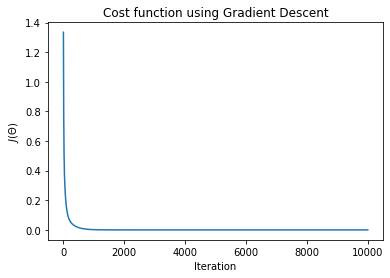

In [8]:
alpha =0.1
n_iter = 10000

theta = np.random.randn(3,1)
print(theta)

print(computeCost(theta,x,y))

theta,cost_history,theta_history = gradient_descent(x,y,theta,alpha,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

This gives us coefficients correspond to each of the three features from above. The first value from our array ( 1.00000000e+00, or 1) is the coefficient on “initial_position.” And in fact, in our original equation, we have the initial velocity ($X_{0}$) with a coefficient of one. 

The second in our list is also a coefficient of 1, which corresponds to ‘initial_velocity time,’ or initial velocity multiplied by time. Again, we have this factor in our original equation, which appears as $V_{0}t$. 

Finally, the very last value is -4.9, which is the coefficient corresponding to ‘time ^ 2.’ Note that this also appears in our original equation as $\frac{1}{2}gt^{2}$. But we said earlier that $g$ is approximately 9.8, and $-\frac{1}{2} * 9.8 = -4.9$. So this also corresponds with our original equation.

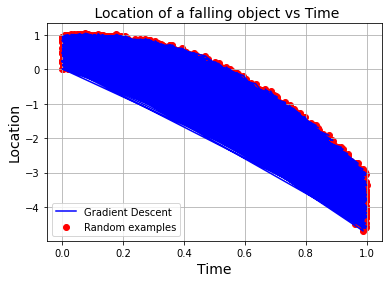

In [31]:
x_0 = df[:,0]
v_0 = df[:,1]
t = df[:,3]
y_grad = x_0+v_0*t-4.9*t**2

plt.scatter(t, df[:,4],label='Random examples', color='red')
plt.plot(t,y_grad,'b-',label='Gradient Descent',color='blue')
plt.title(' Location of a falling object vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()